## Inference Demo

In [3]:
xgboost_path = "model/xgb_model_700&625.json"
data_path = "data/training_dataset_sap700&625.parquet"

In [2]:
pip install pyarrow

Note: you may need to restart the kernel to use updated packages.


In [4]:
import pyarrow.parquet as pq

# Load the Parquet file with data
df = pq.read_table(data_path).to_pandas()

In [4]:
df

,VoltageOut1_V___mode_5,VoltageOut1_V___mode_10,VoltageOut1_V___stretch_decreasing,VoltageOut1_V___outlier_timing_pos,VoltageOut1_V___outlier_timing_neg,VoltageOut1_V___acf_timescale,VoltageOut1_V___acf_first_min,VoltageOut1_V___centroid_freq,VoltageOut1_V___low_freq_power,VoltageOut1_V___forecast_error,...,T6WaterOutlet1__whiten_timescale,T6WaterOutlet1__embedding_dist,T6WaterOutlet1__dfa,T6WaterOutlet1__rs_range,T6WaterOutlet1__transition_matrix,T6WaterOutlet1__periodicity,T6WaterOutlet1__mean,T6WaterOutlet1__std,class,serial_nr
0,NaN,NaN,1.0,0.003333,NaN,300.0,300.0,NaN,NaN,NaN,...,0.036697,4.678155,0.795455,0.136364,0.166667,NaN,25.512600,1.756205,1,209759951
1,432.100006,432.049988,7.0,0.003333,NaN,1.0,2.0,0.014178,1.644427,0.331988,...,0.036697,3.791572,0.863636,0.136364,0.166667,NaN,26.466333,1.817128,1,209779121
2,422.100006,422.049988,10.0,0.003333,NaN,1.0,2.0,0.016911,1.362175,0.309720,...,0.036364,4.424044,0.863636,0.863636,0.166667,NaN,26.822533,1.545022,1,209784112
3,NaN,NaN,1.0,0.003333,NaN,300.0,300.0,NaN,NaN,NaN,...,0.046296,3.916686,0.840909,0.818182,0.166667,NaN,28.357533,1.898640,1,209795929
4,395.067017,395.033508,4.0,0.003333,NaN,1.0,1.0,0.008081,1.472622,0.163815,...,0.045872,3.493771,0.590909,0.840909,0.166667,60.0,29.036567,2.122785,1,209833921
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6405,394.325012,394.312500,11.0,0.003333,NaN,4.0,4.0,0.001661,0.282252,0.042872,...,0.009615,4.788293,0.863636,0.795455,0.166667,NaN,25.972500,0.453048,0,210724711
6406,414.695007,414.717499,34.0,0.003333,NaN,9.0,4.0,0.001933,0.159534,0.035091,...,0.009524,4.611137,0.818182,0.568182,0.166667,NaN,25.925667,0.290989,0,210724712
6407,393.524994,393.512512,99.0,0.003333,NaN,60.0,3.0,0.002008,0.024544,0.027895,...,0.011628,6.763943,0.795455,0.818182,0.111111,NaN,26.132333,0.247699,0,210724714
6408,394.589996,394.604980,13.0,0.003333,NaN,5.0,13.0,0.006400,0.257709,0.053859,...,0.009709,5.149851,0.795455,0.159091,0.166667,NaN,26.492667,0.438478,0,210724718


Drop class and product serial_nr for inference

In [5]:
df.drop(columns=['class', 'serial_nr'], inplace=True)

Load XGBOOST model

In [6]:
pip install xgboost

Note: you may need to restart the kernel to use updated packages.


In [ ]:
pip install scikit-learn

In [7]:
from xgboost import XGBClassifier
model = XGBClassifier()
model.load_model(xgboost_path)


In [8]:
import numpy as np

# Generate a random integer between 0 and the number of rows in our df
random_index = np.random.randint(0, len(df))


Prediction on one sample

In [10]:
y = model.predict_proba(df.iloc[[random_index]])
# The output is [PASS class probability, FAIL class probability)
# PASS = 0; FAIL = 1
print(y)

[[0.7351598 0.2648402]]


In [10]:
pip install shap

Note: you may need to restart the kernel to use updated packages.


In [11]:
import shap
explainer = shap.TreeExplainer(model)

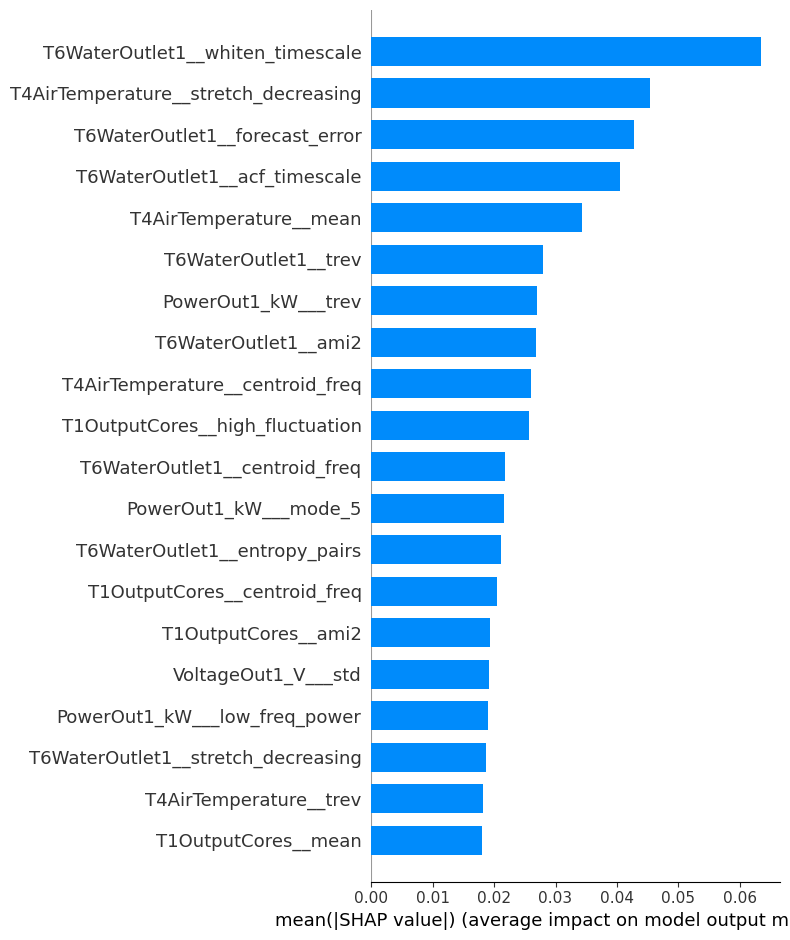

In [13]:
shap_values = explainer(df)
shap.summary_plot(shap_values,df,plot_type="bar")

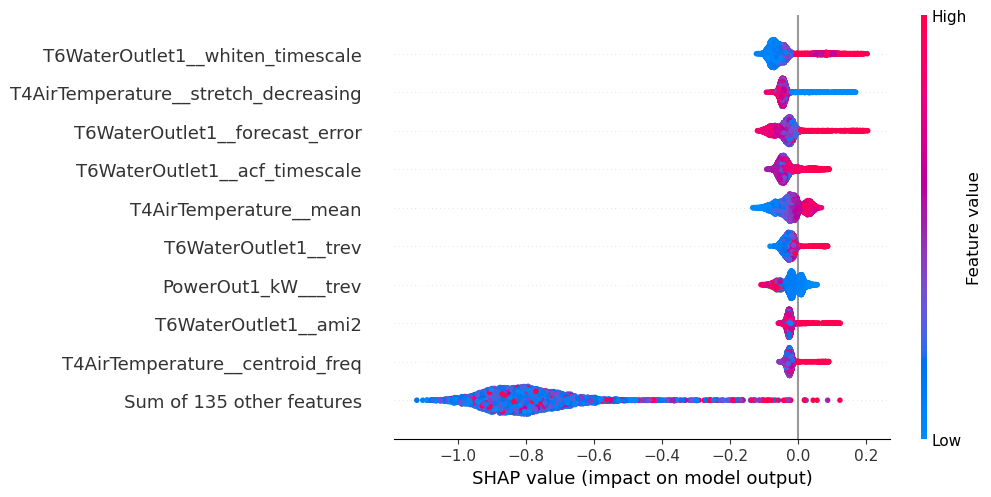

In [14]:
shap.plots.beeswarm(shap_values,max_display=10)